In [1]:
#STEP 1: Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [3]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [5]:
#STEP 2: Creating a file path
path = r'/Users/samarjitgehdu/Documents/Achievement 6/Gun Violence'

In [7]:
path

'/Users/samarjitgehdu/Documents/Achievement 6/Gun Violence'

In [9]:
# Importing the gun violence file
df = pd.read_csv(os.path.join(path,'02 Data', 'Prepared Data', 'Gun_Violence_Clean_Data(2013-2018).csv'))

In [11]:
# Select numerical features and drop identifiers
df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric = df_numeric.drop(columns=['Unnamed: 0', 'incident_id'], errors='ignore')

In [13]:
# STEP 3: Elbow Technique
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [15]:
# Creates a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df_numeric).score(df_numeric) for i in range(len(kmeans))]

In [17]:
score

[-588036545.5126582,
 -257062133.65273702,
 -192454462.72930276,
 -160442440.2634903,
 -135459241.78174078,
 -123908203.2864646,
 -112814500.94364545,
 -93257449.1625606,
 -83774345.54974803]

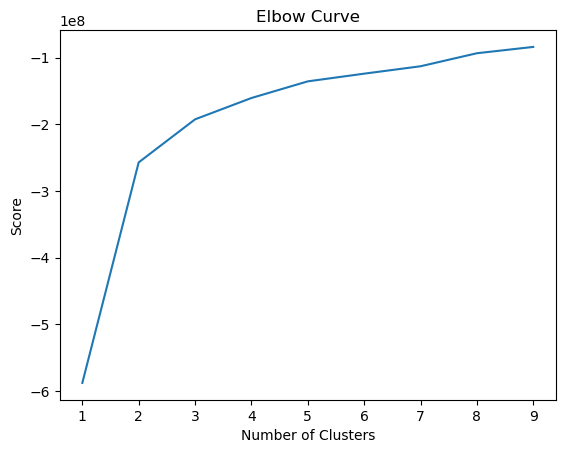

In [19]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### STEP 4: There's a jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

In [22]:
#STEP 5: Run Kmeans algorithm
kmeans = KMeans(n_clusters = 3) 

In [24]:
# Fit the k-means object to the data.
kmeans.fit(df_numeric)

KMeans(n_clusters=3)

In [26]:
#STEP 6: Attaching a new column in df_numeric showing count of clusters
df_numeric['clusters'] = kmeans.fit_predict(df_numeric)

In [28]:
df_numeric.head()

,n_killed,n_injured,congressional_district,latitude,longitude,n_guns_involved,state_house_district,state_senate_district,clusters
0,0,4,14.0,40.3467,-79.8559,1.0,-1.0,-1.0,0
1,1,3,43.0,33.9090,-118.3330,1.0,62.0,35.0,1
2,1,3,9.0,41.4455,-82.1377,2.0,56.0,13.0,1
3,4,0,6.0,39.6518,-104.8020,1.0,40.0,28.0,1
4,2,2,6.0,36.1140,-79.9569,2.0,62.0,27.0,1


In [30]:
df_numeric['clusters'].value_counts().sort_index()

clusters
0    114116
1     76655
2     48906
Name: count, dtype: int64

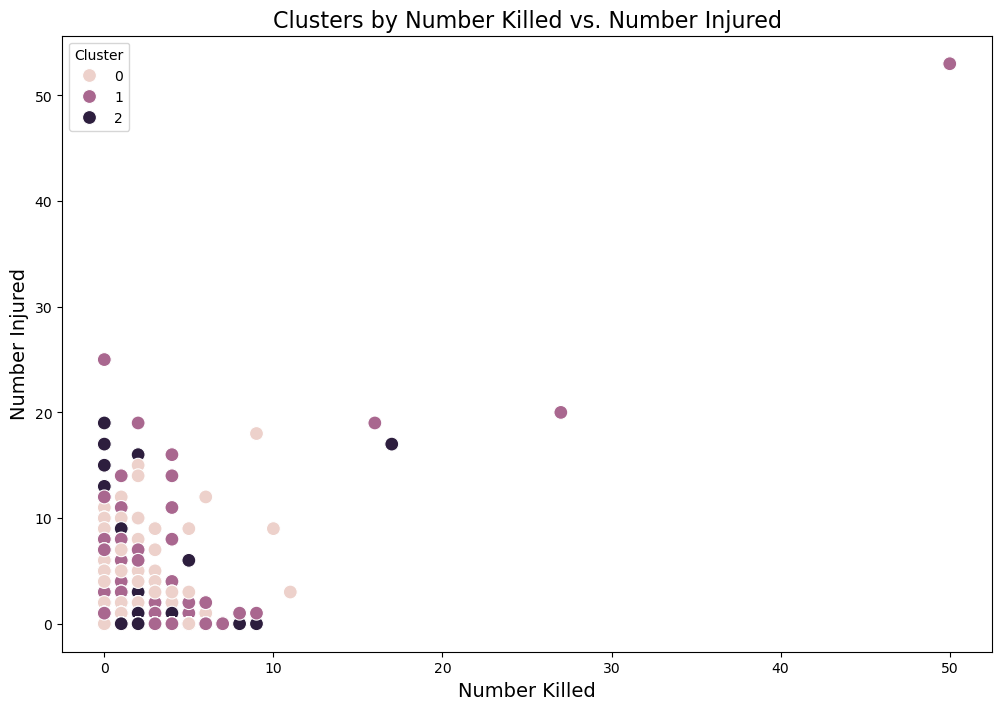

In [32]:
#STEP 7: Visualizations
# Scatter plot: n_killed vs. n_injured

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numeric['n_killed'], y=df_numeric['n_injured'], hue=kmeans.labels_, s=100) 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.
plt.title('Clusters by Number Killed vs. Number Injured', fontsize=16)
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Number Killed', fontsize=14) # Label x-axis.
plt.ylabel('Number Injured', fontsize=14)# Label y-axis.
plt.legend(title='Cluster')
plt.show()

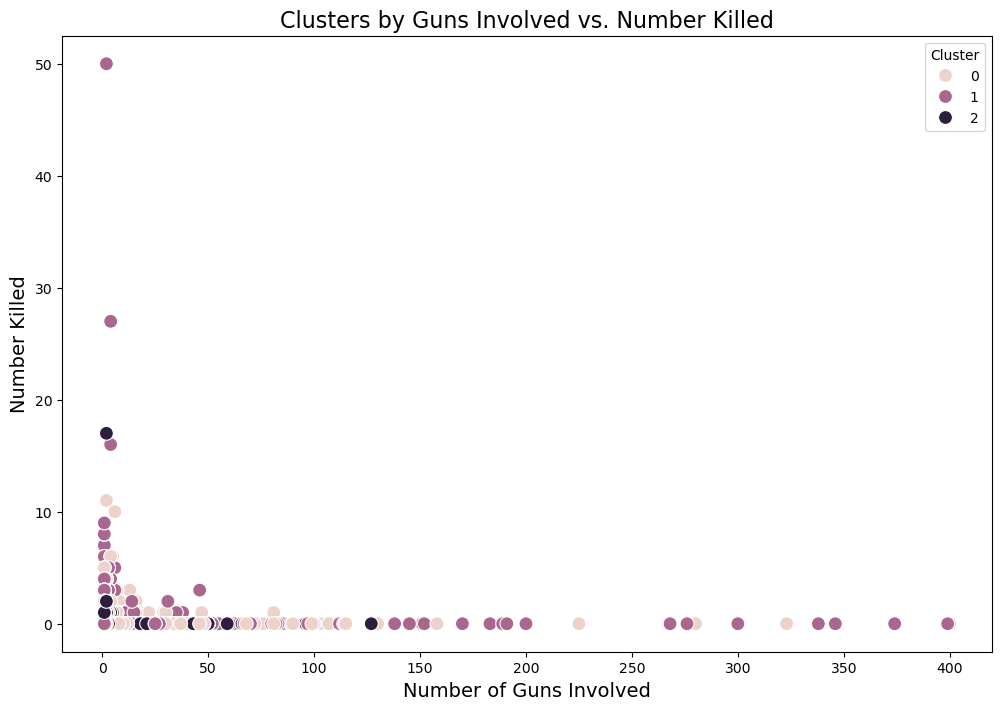

In [34]:
# Scatter plot: n_guns_involved vs. n_killed
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_numeric['n_guns_involved'], y=df_numeric['n_killed'], hue=kmeans.labels_, s=100)
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.
ax.grid(False) # This removes the grid from the background.
plt.title('Clusters by Guns Involved vs. Number Killed', fontsize=16)
plt.xlabel('Number of Guns Involved', fontsize=14) # Label x-axis.
plt.ylabel('Number Killed', fontsize=14) # Label y-axis.
plt.legend(title='Cluster')
plt.show()

### STEP 8. Interpretation & Insights
Cluster Interpretation:
- Cluster 0: Lower casualties and gun involvement — likely low-scale events.
- Cluster 1: Moderate gun use, higher injuries — could indicate chaotic settings.
- Cluster 2: High gun count and casualties — organized or mass violence.

In [39]:
#STEP 9: Descriptive Statistics per Cluster
df_numeric.groupby('clusters').agg({'n_killed':['mean', 'median'], 
                         'n_injured':['mean', 'median'], 
                         'n_guns_involved':['mean', 'median']})

n_killed        n_injured        n_guns_involved       
              mean median      mean median            mean median
clusters                                                         
0         0.252664    0.0  0.511558    0.0        1.204835    1.0
1         0.259018    0.0  0.474477    0.0        1.276942    1.0
2         0.240870    0.0  0.483663    0.0        1.155850    1.0

### STEP 10:  Future Use Cases:
- Policy design for high-risk clusters.
- Predictive modeling using clusters.
- Geographic intervention based on cluster prevalence.
- Public awareness & safety measures tailored to cluster characteristics.

In [42]:
#Export data
df_numeric.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Gun_Violence_Clustered_Data(2013-2018).csv'))